In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./All years (Weekly Fuel Prices).csv', encoding='ISO-8859-1', sep='\t')

In [3]:
df

,Date,Diesel/Petrol,Pump Price
0,6/9/2003,Diesel,£76.77
1,6/9/2003,Petrol,£74.59
2,6/16/2003,Diesel,£76.69
3,6/16/2003,Petrol,£74.47
4,6/23/2003,Diesel,£76.62
...,...,...,...
1759,3/23/2020,Petrol,£119.64
1760,3/30/2020,Petrol,£112.45
1761,4/6/2020,Petrol,£110.23
1762,4/13/2020,Petrol,£109.27


In [4]:
df = df.rename(columns={'Diesel/Petrol': 'FuelType', 'Pump Price': 'Price'})
df

,Date,FuelType,Price
0,6/9/2003,Diesel,£76.77
1,6/9/2003,Petrol,£74.59
2,6/16/2003,Diesel,£76.69
3,6/16/2003,Petrol,£74.47
4,6/23/2003,Diesel,£76.62
...,...,...,...
1759,3/23/2020,Petrol,£119.64
1760,3/30/2020,Petrol,£112.45
1761,4/6/2020,Petrol,£110.23
1762,4/13/2020,Petrol,£109.27


In [5]:
# df['Date'] = df['Date\tDiesel/Petrol\tPump Price'].apply(lambda x: re.findall('\d{1,2}/\d{1,2}/\d{4}', x)[0])
# df['FuelType'] = df['Date\tDiesel/Petrol\tPump Price'].apply(lambda x: re.findall('(Diesel|Petrol)', x)[0])
# df['Price'] = df['Date\tDiesel/Petrol\tPump Price'].apply(lambda x: re.findall('£(\d+\.\d+)', x)[0])

In [6]:
# df['Date'], df['FuelType'], df['Price'] = df['Date\tDiesel/Petrol\tPump Price'].str.split('\t', 2).str
# df

In [7]:
# since the mixed column in unnessary let's remove it
# df.drop('Date\tDiesel/Petrol\tPump Price', axis=1, inplace=True)
# df

In [8]:
# got error while directly setting astype so followed 3 steps
df['Price'] = df['Price'].str.replace('£', '').str.strip()
df['Price'] = df['Price'].replace('', np.nan)
df['Price'] = df['Price'].astype(float)
df

,Date,FuelType,Price
0,6/9/2003,Diesel,76.77
1,6/9/2003,Petrol,74.59
2,6/16/2003,Diesel,76.69
3,6/16/2003,Petrol,74.47
4,6/23/2003,Diesel,76.62
...,...,...,...
1759,3/23/2020,Petrol,119.64
1760,3/30/2020,Petrol,112.45
1761,4/6/2020,Petrol,110.23
1762,4/13/2020,Petrol,109.27


In [9]:
# change date column to date time format
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,FuelType,Price
0,2003-06-09,Diesel,76.77
1,2003-06-09,Petrol,74.59
2,2003-06-16,Diesel,76.69
3,2003-06-16,Petrol,74.47
4,2003-06-23,Diesel,76.62
...,...,...,...
1759,2020-03-23,Petrol,119.64
1760,2020-03-30,Petrol,112.45
1761,2020-04-06,Petrol,110.23
1762,2020-04-13,Petrol,109.27


Since we will be using ARIMA model which is univariate model so lets sepereate features as per FuelTypes

In [10]:
df_diesel = df[df['FuelType'] == 'Diesel']
df_petrol = df[df['FuelType'] == 'Petrol']

In [11]:
df_diesel.drop(columns=['FuelType'], axis=1, inplace=True)
df_petrol.drop(columns=['FuelType'], axis=1, inplace=True)

/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_30128/162402126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel.drop(columns=['FuelType'], axis=1, inplace=True)
/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_30128/162402126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol.drop(columns=['FuelType'], axis=1, inplace=True)


In [12]:
# setting Date as index for both category
df_diesel.set_index('Date', inplace=True)
df_petrol.set_index('Date', inplace=True)

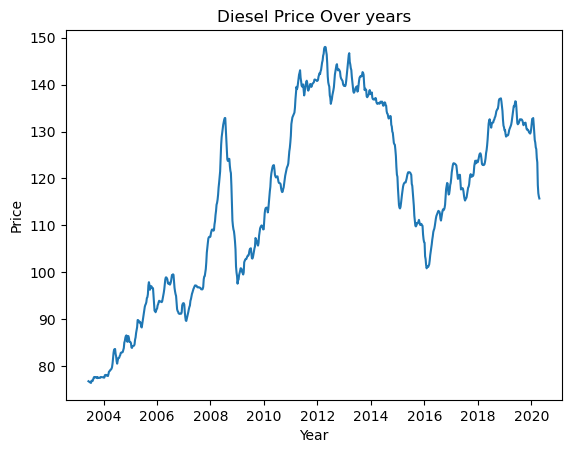

In [13]:
# plotting diesel
plt.title('Diesel Price Over years')
plt.ylabel('Price')
plt.xlabel('Year')
plt.plot(df_diesel.index, df_diesel['Price'], )

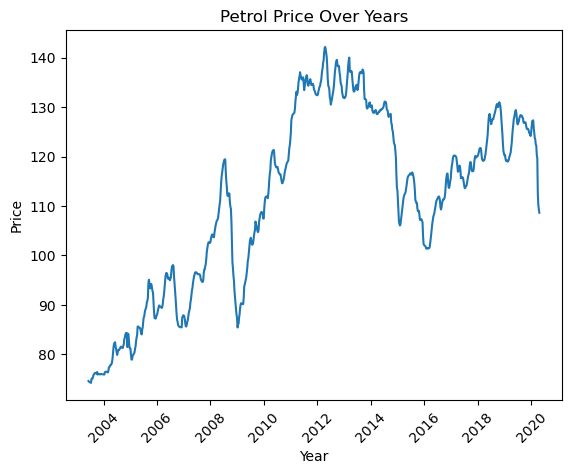

In [14]:
# plotting petrol chart over years
plt.title('Petrol Price Over Years')
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.plot(df_petrol.index, df_petrol['Price'])

In [15]:
diesel_train = df_diesel[df_diesel.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
diesel_test = df_diesel[df_diesel.index > pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
petrol_train = df_petrol[df_petrol.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
petrol_test = df_petrol[df_petrol.index > pd.to_datetime("2019-01-01", format='%Y-%m-%d')]

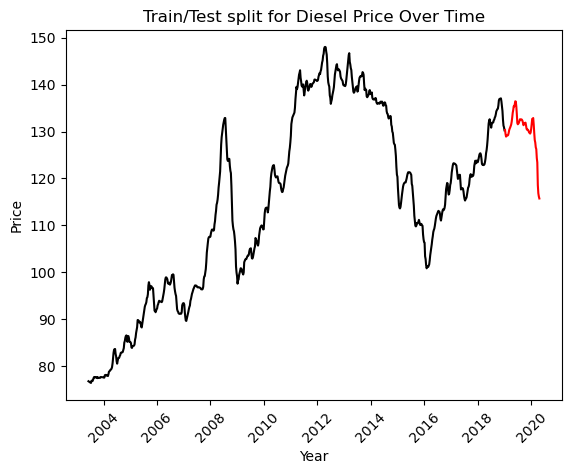

In [16]:
plt.plot(diesel_train, color = "black")
plt.plot(diesel_test, color = "red")
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test split for Diesel Price Over Time")
plt.show()

In [17]:
# plt.plot(petrol_train, color = "black")
# plt.plot(petrol_test, color = "red")
# plt.ylabel('Price')
# plt.xlabel('Year')
# plt.xticks(rotation=45)
# plt.title("Train/Test split for Petrol Price Over Time")
# plt.show()

In [18]:
# lets use SARIMAX from ARMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
diesel_model = SARIMAX(diesel_train['Price'], order=(1,0,1))

/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
ARMAmodel = diesel_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14394D+03    |proj g|=  1.49474D+04

At iterate    5    f=  3.10072D+01    |proj g|=  6.42956D+01

At iterate   10    f=  3.59518D+00    |proj g|=  2.43106D+00

At iterate   15    f=  1.56948D+00    |proj g|=  1.67976D-01

At iterate   20    f=  1.07436D+00    |proj g|=  2.42726D-01

At iterate   25    f=  9.94184D-01    |proj g|=  2.09132D-02

At iterate   30    f=  9.83528D-01    |proj g|=  1.95728D-03

At iterate   35    f=  9.82680D-01    |proj g|=  3.02235D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


In [21]:
diesel_pred = ARMAmodel.get_forecast(len(diesel_test.index))
diesel_pred_df = diesel_pred.conf_int(alpha = 0.05)
diesel_pred_df['Predictions'] = ARMAmodel.predict(start = diesel_pred_df.index[0], end=diesel_pred_df.index[-1])
diesel_pred_df.index = diesel_test.index
diesel_pred_out = diesel_pred_df['Predictions']


/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in 

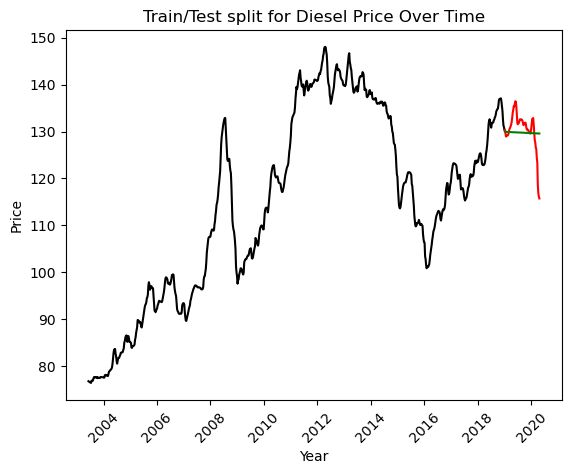

In [22]:
plt.plot(diesel_train, color = "black", label='Training')
plt.plot(diesel_test, color = "red", label='Testing')
plt.plot(diesel_pred_out, color='green', label='Predictions')
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test split for Diesel Price Over Time")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
arma_rmse = np.sqrt(mean_squared_error(diesel_test['Price'].values, diesel_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  4.154995860839508


In [25]:
# lets try using ARIMA model to make predictions
from statsmodels.tsa.arima.model import ARIMA

In [26]:
ARIMAmodel = ARIMA(diesel_train['Price'], order = (1, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
diesel_pred = ARIMAmodel.get_forecast(len(diesel_test.index))
diesel_pred_df = diesel_pred.conf_int(alpha = 0.05)
diesel_pred_df['Predictions'] = ARIMAmodel.predict(start = diesel_pred_df.index[0], end=diesel_pred_df.index[-1])
diesel_pred_df.index = diesel_test.index
diesel_pred_out = diesel_pred_df['Predictions']

/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/achbj/opt/miniconda3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in 

In [28]:
arma_rmse = np.sqrt(mean_squared_error(diesel_test['Price'].values, diesel_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  5.005098208289381


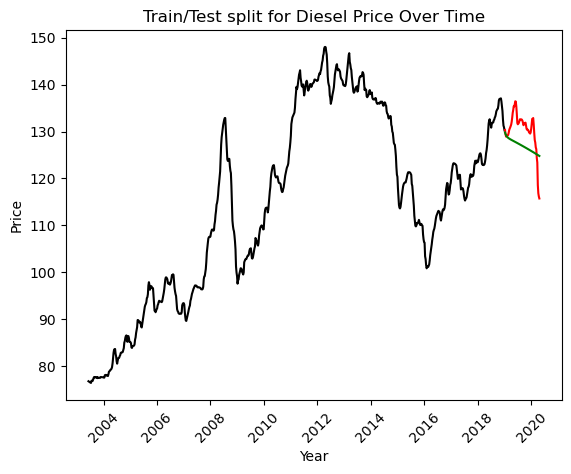

In [29]:
plt.plot(diesel_train, color = "black", label='Training')
plt.plot(diesel_test, color = "red", label='Testing')
plt.plot(diesel_pred_out, color='green', label='Predictions')
plt.ylabel('Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test split for Diesel Price Over Time")
plt.show()